# ...Made by Cristiano dos Anjos...
##### cristianodosanjos019@gmail.com

# This project is about Human Resources.

### In this project we are going to analyze the data of a company to find out which is the type of employes are going to retire and resign with more frequency.

+ The column Attrition is in focus in this project.
  + The column Attrition = Yes means that the employe will retire or resign, and Attrition = No means that the employe will stay at our company.
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df1 = pd.read_csv('C:/Users/7c4/Documents/Project-A/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df1.shape

(1470, 35)

#### We have 1470 employes in this dataset.

#### We don't go use every column in dataset, let's separate some columns that we consider more important for us.

In [4]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df = df1[['Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion']]

In [6]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,4,Single,5993,8,Yes,3,1,0,6,0
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,2,Married,5130,1,No,4,4,1,10,1
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,3,Single,2090,6,Yes,3,2,0,0,0


In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64

#### As we can see, we don't have any missing value.

#### So let's get started our analyze.

In [8]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,7.008163,2.187755
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,6.126525,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,5.000000,1.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,9.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,40.000000,15.000000


In [9]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,0.001904,0.053535,0.037510,0.311309,0.216513
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,0.027110,0.006557,0.044872,0.009508,0.010029
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,-0.024539,-0.009118,0.018422,0.069114,0.054254
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,-0.029548,0.007665,0.003432,0.001458,0.016194
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,0.002297,-0.012454,0.010690,-0.003803,-0.018214
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,-0.017120,0.025873,0.005408,0.514285,0.344978
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.014095,0.052733,0.030075,-0.118421,-0.036814
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,0.002297,-0.017120,-0.014095,1.000000,-0.031351,0.003506,0.003435,0.017896
RelationshipSatisfaction,0.053535,0.006557,-0.009118,0.007665,-0.012454,0.025873,0.052733,-0.031351,1.000000,-0.045952,0.019367,0.033493
StockOptionLevel,0.037510,0.044872,0.018422,0.003432,0.010690,0.005408,0.030075,0.003506,-0.045952,1.000000,0.015058,0.014352


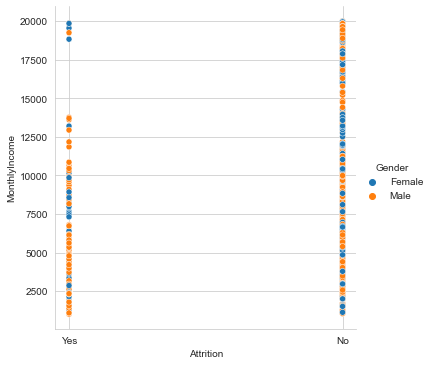

In [10]:
sns.relplot(x='Attrition', y='MonthlyIncome', hue='Gender', data=df)
plt.show()

#### The graph above is showing us that men is retire and resign more than women, and we can see that ours employes with lower salaries is resigning and retiring more.

In [11]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,4,Single,5993,8,Yes,3,1,0,6,0
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,2,Married,5130,1,No,4,4,1,10,1
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,3,Single,2090,6,Yes,3,2,0,0,0


#### Let's change our column called Attrition to 1 or 0, the of 1 means that the employe get out of our company and the value 0 means the otherwise. We are doing it to our future model and to see the correlation of it according to others columns.

In [12]:
dfA = df[['Attrition', 'Department']]

In [13]:
dfA[dfA['Attrition']=='Yes'] = 1
dfA[dfA['Attrition']=='No'] = 0

<ipython-input-13-1699c7e3114f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA[dfA['Attrition']=='Yes'] = 1
C:\Users\7c4\Documents\WPy64-3870\python-3.8.7.amd64\lib\site-packages\pandas\core\frame.py:3063: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(indexer, value)
C:\Users\7c4\Documents\WPy64-3870\python-3.8.7.amd64\lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [14]:
dfA.head(3)

,Attrition,Department
0,1,1
1,0,0
2,1,1


In [15]:
df['Attrition'] = dfA['Attrition']
df.head(3)

<ipython-input-15-2628196846ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = dfA['Attrition']


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,Sales,1,2,2,Female,4,Single,5993,8,Yes,3,1,0,6,0
1,49,0,Travel_Frequently,Research & Development,8,1,3,Male,2,Married,5130,1,No,4,4,1,10,1
2,37,1,Travel_Rarely,Research & Development,2,2,4,Male,3,Single,2090,6,Yes,3,2,0,0,0


In [16]:
df['Attrition'].dtypes

dtype('O')

#### Now let's change the type of the new column to int.

In [17]:
df['Attrition'] = df['Attrition'].astype('int')

<ipython-input-17-e54eb584537f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].astype('int')


In [18]:
df.corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,-0.159205,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,0.001904,0.053535,0.037510,0.311309,0.216513
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.103369,-0.103481,-0.159840,0.043494,0.002889,-0.045872,-0.137145,-0.134392,-0.033019
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,0.027110,0.006557,0.044872,0.009508,0.010029
Education,0.208034,-0.031373,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,-0.024539,-0.009118,0.018422,0.069114,0.054254
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,-0.029548,0.007665,0.003432,0.001458,0.016194
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,0.002297,-0.012454,0.010690,-0.003803,-0.018214
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,-0.017120,0.025873,0.005408,0.514285,0.344978
NumCompaniesWorked,0.299635,0.043494,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.014095,0.052733,0.030075,-0.118421,-0.036814
PerformanceRating,0.001904,0.002889,0.027110,-0.024539,-0.029548,0.002297,-0.017120,-0.014095,1.000000,-0.031351,0.003506,0.003435,0.017896
RelationshipSatisfaction,0.053535,-0.045872,0.006557,-0.009118,0.007665,-0.012454,0.025873,0.052733,-0.031351,1.000000,-0.045952,0.019367,0.033493


#### Done. Now we can are going to analyze with more accuracy.

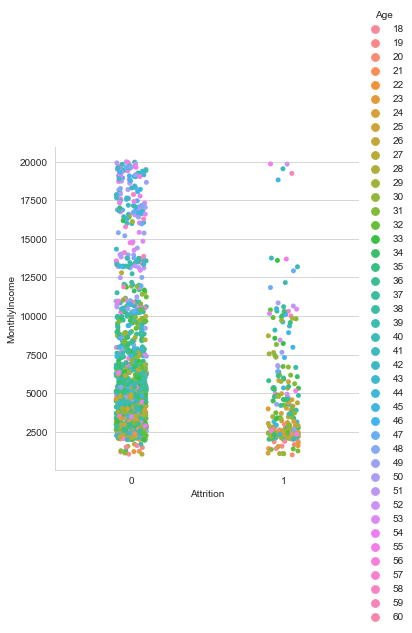

In [19]:
sns.catplot(data = df, x='Attrition', y='MonthlyIncome', hue='Age')
plt.show()

#### As we can see above, ours employes with salaries around of three thousand dollars are having more records than others in this graph, ours employes with less than ten thousand dollars of salary are leaving with more proportion than others employes, and the most of ours employes that are resigning or retire have between 18 and 33 years old.

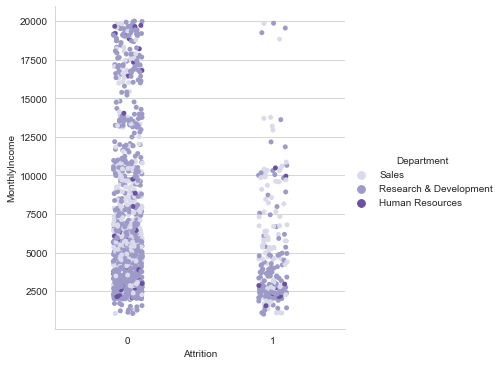

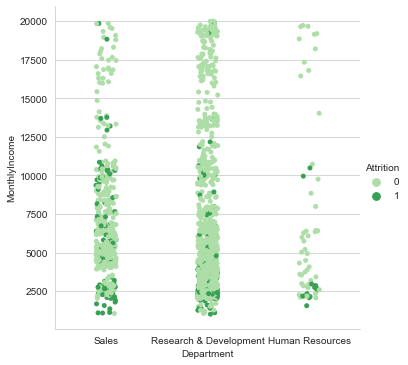

In [20]:
palette = sns.color_palette('Purples', 3)
palette2 = sns.color_palette('Greens', 2)
sns.catplot(x='Attrition', y='MonthlyIncome', hue='Department', data=df, palette=palette)
sns.catplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df, palette=palette2)
plt.show()

#### With graph above we can see that the most of our employes that are requesting for retire or resigning are from sales department.

In [21]:
df_dep = df[df['Department']=='Sales']
display(df_dep)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,Sales,1,2,2,Female,4,Single,5993,8,Yes,3,1,0,6,0
18,53,0,Travel_Rarely,Sales,2,4,1,Female,4,Married,15427,2,No,3,3,0,25,3
21,36,1,Travel_Rarely,Sales,9,4,3,Male,1,Single,3407,7,No,4,2,0,5,0
27,42,0,Travel_Rarely,Sales,8,4,3,Male,2,Married,6825,0,No,3,4,1,9,4
29,46,0,Travel_Rarely,Sales,2,4,2,Female,1,Single,18947,3,No,3,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,0,Travel_Rarely,Sales,20,3,4,Female,3,Single,4850,8,No,3,3,0,5,0
1461,50,1,Travel_Rarely,Sales,28,3,4,Male,1,Divorced,10854,4,Yes,3,2,1,3,2
1462,39,0,Travel_Rarely,Sales,24,1,2,Female,4,Married,12031,0,No,3,1,1,20,9
1464,26,0,Travel_Rarely,Sales,5,3,4,Female,3,Single,2966,0,No,3,4,0,4,0


#### Above can see the data created for us. Now let's analyze ours employes that are requesting to get out of are company according to sales department.

In [22]:
df_dep.corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
Age,1.000000,-0.128923,-0.034716,0.188859,-0.077878,-0.005547,0.509813,0.301875,0.015840,0.114491,0.050576,0.368342,0.264879
Attrition,-0.128923,1.000000,0.090808,-0.048517,-0.099780,-0.105362,-0.132122,0.080728,-0.041654,-0.019646,-0.166162,-0.145203,-0.024139
DistanceFromHome,-0.034716,0.090808,1.000000,0.037352,-0.015566,-0.006861,-0.010010,-0.001507,0.043385,0.109904,0.060497,-0.083452,-0.035612
Education,0.188859,-0.048517,0.037352,1.000000,-0.038790,-0.002388,0.146124,0.114304,-0.006549,0.051160,0.042626,0.117888,0.040473
EnvironmentSatisfaction,-0.077878,-0.099780,-0.015566,-0.038790,1.000000,0.030610,-0.035772,-0.009577,-0.080987,0.002594,0.011388,-0.018708,-0.033586
JobSatisfaction,-0.005547,-0.105362,-0.006861,-0.002388,0.030610,1.000000,-0.014379,-0.030377,0.030465,-0.006983,-0.000329,0.010902,-0.035390
MonthlyIncome,0.509813,-0.132122,-0.010010,0.146124,-0.035772,-0.014379,1.000000,0.175735,-0.010194,0.077202,0.022636,0.569820,0.343318
NumCompaniesWorked,0.301875,0.080728,-0.001507,0.114304,-0.009577,-0.030377,0.175735,1.000000,-0.061436,0.081046,-0.007975,-0.082619,0.023324
PerformanceRating,0.015840,-0.041654,0.043385,-0.006549,-0.080987,0.030465,-0.010194,-0.061436,1.000000,-0.043378,0.037430,0.108580,0.125439
RelationshipSatisfaction,0.114491,-0.019646,0.109904,0.051160,0.002594,-0.006983,0.077202,0.081046,-0.043378,1.000000,0.000484,0.015114,0.033786


In [23]:
N_dep = df_dep[df_dep['Attrition']==0]
Y_dep = df_dep[df_dep['Attrition']==1]

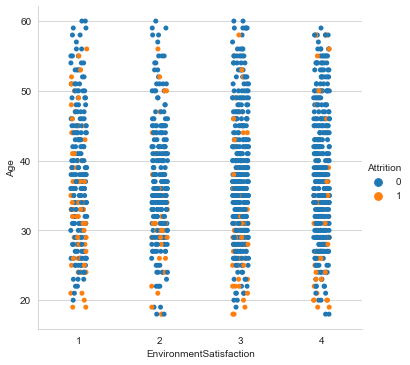

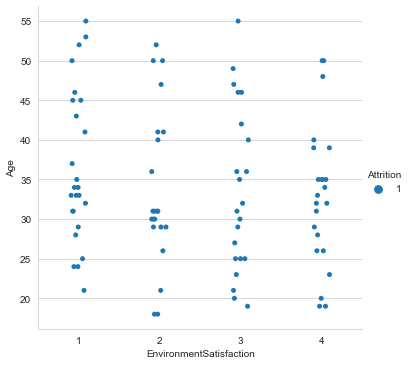

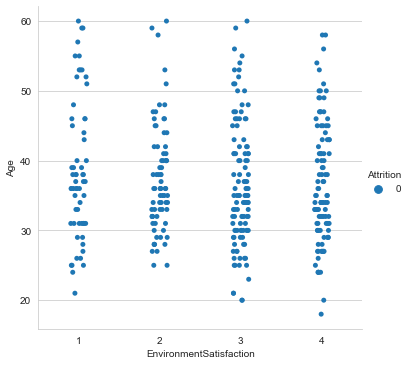

In [24]:
sns.catplot(x='EnvironmentSatisfaction', y='Age', hue='Attrition', data=df)
sns.catplot(x='EnvironmentSatisfaction', y='Age', hue='Attrition', data=Y_dep)
sns.catplot(x='EnvironmentSatisfaction', y='Age', hue='Attrition', data=N_dep)
plt.show()

#### The graphics above isn't showing us a great insight based in environment satisfaction, but in proportion, we can say that people who were saying that wouldn't be satisfied with work's environment of them, want to retire or resign.

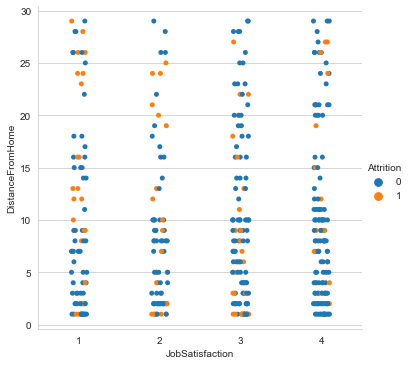

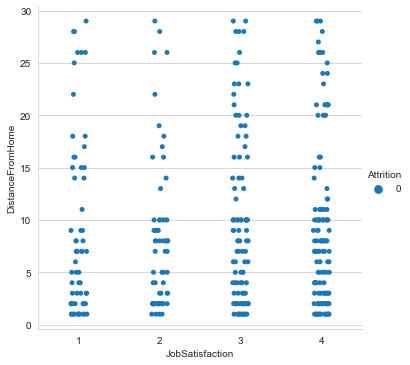

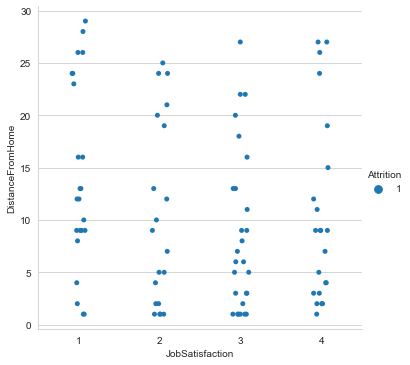

In [25]:
sns.catplot(x='JobSatisfaction', y='DistanceFromHome', hue='Attrition', data=df_dep)
sns.catplot(x='JobSatisfaction', y='DistanceFromHome', hue='Attrition', data=N_dep)
sns.catplot(x='JobSatisfaction', y='DistanceFromHome', hue='Attrition', data=Y_dep)
plt.show()

#### In this three graphs about people satisfied in the job we can see the same thing of the previously explanation.

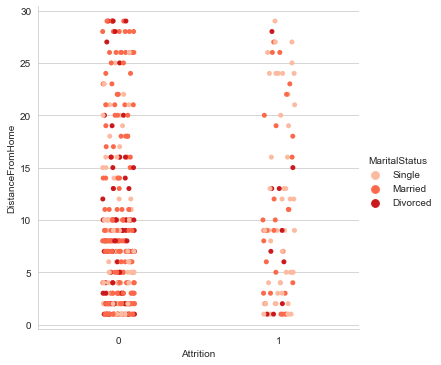

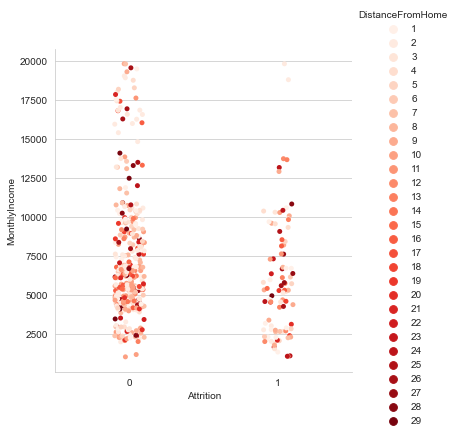

In [26]:
palette=sns.color_palette('Reds', 3)
palette2=sns.color_palette('Reds', 29)
sns.catplot(x='Attrition', y='DistanceFromHome', hue='MaritalStatus', data=df_dep, palette=palette)
sns.catplot(x='Attrition', y='MonthlyIncome', hue='DistanceFromHome', data=df_dep, palette=palette2)
plt.show()

#### The graphs above shows nothing clearly, let's improve this visualization.

In [29]:
df_m10 = df_dep[df_dep['DistanceFromHome']>9]
df_m9 = df_dep[df_dep['DistanceFromHome']<10]

In [31]:
df_m9.tail(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
1452,50,1,Travel_Frequently,Sales,1,4,2,Male,3,Divorced,6728,7,No,3,4,2,6,0
1464,26,0,Travel_Rarely,Sales,5,3,4,Female,3,Single,2966,0,No,3,4,0,4,0
1468,49,0,Travel_Frequently,Sales,2,3,4,Male,2,Married,5390,2,No,3,4,0,9,0


In [35]:
df_m10.tail(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
1454,45,0,Travel_Rarely,Sales,20,3,4,Female,3,Single,4850,8,No,3,3,0,5,0
1461,50,1,Travel_Rarely,Sales,28,3,4,Male,1,Divorced,10854,4,Yes,3,2,1,3,2
1462,39,0,Travel_Rarely,Sales,24,1,2,Female,4,Married,12031,0,No,3,1,1,20,9


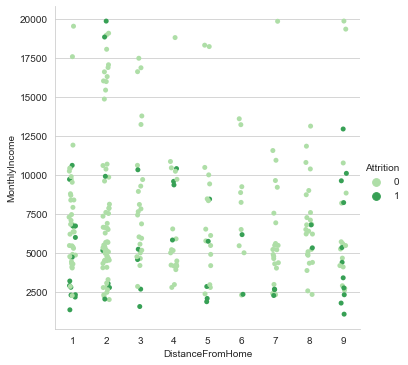

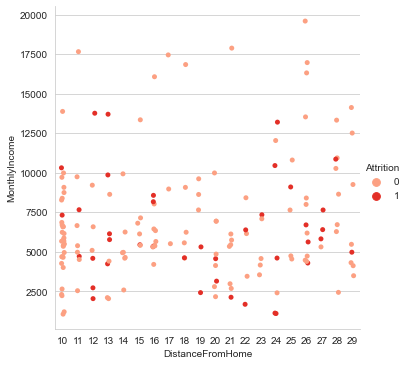

In [37]:
palette = sns.color_palette('Greens', 2)
palette2 = sns.color_palette('Reds', 2)
sns.catplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=df_m9, palette=palette)
sns.catplot(x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', data=df_m10, palette=palette2)
plt.show()

 #### With the graphs above we can see that ours employes doesn't care about the distance from home, and they don't get out of our company unsatisfied with it.

In [39]:
df_dep.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,Sales,1,2,2,Female,4,Single,5993,8,Yes,3,1,0,6,0
18,53,0,Travel_Rarely,Sales,2,4,1,Female,4,Married,15427,2,No,3,3,0,25,3
21,36,1,Travel_Rarely,Sales,9,4,3,Male,1,Single,3407,7,No,4,2,0,5,0


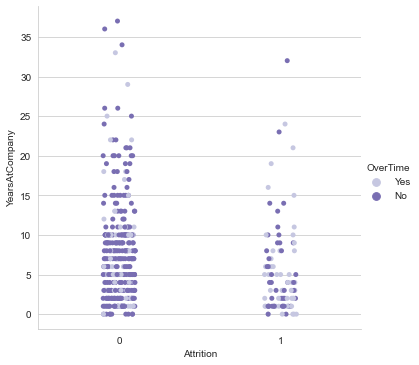

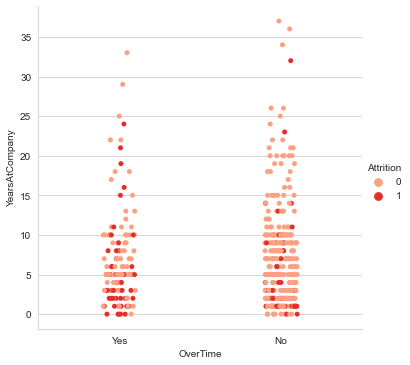

In [40]:
palette=sns.color_palette('Purples', 2)
palette2=sns.color_palette('Reds', 2)
sns.catplot(x='Attrition', y='YearsAtCompany', hue='OverTime', data=df_dep, palette=palette)
sns.catplot(x='OverTime', y='YearsAtCompany', hue='Attrition', data=df_dep, palette=palette2)
plt.show()

#### Clearly, we can see that ours employes working in over time, and mainly the employes with less than 15 years working at our company have more chance to leave than  others.

#### Now we are going to aggregating some data to see more clearly what we have of result in the column OverTime.

In [71]:
df_011am = df_dep[df_dep['MonthlyIncome']<11000]
df_110am = df_dep[df_dep['MonthlyIncome']>11000]

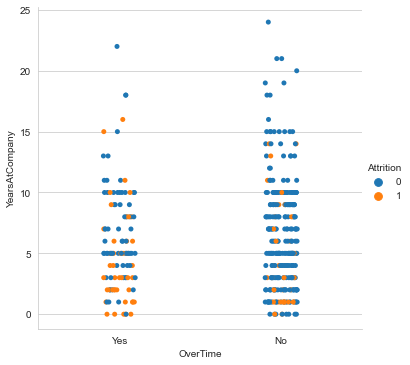

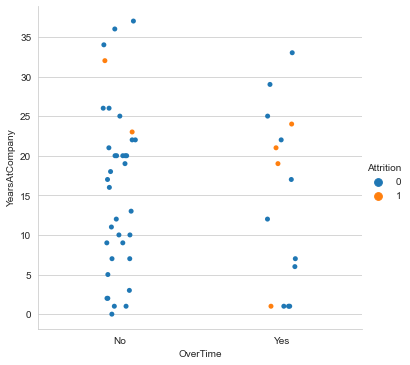

In [72]:
sns.catplot(x='OverTime', y='YearsAtCompany', hue='Attrition', data=df_011am)
sns.catplot(x='OverTime', y='YearsAtCompany', hue='Attrition', data=df_110am)
plt.show()

#### The first graph is showing us that we have a lot of employes that were working overtime with the salary less than eleven thousand dollars are requesting to resgin or retire much more than others. With the second graph we can see that the employes that also are working overtime but have a salary higher than 11 thousand dollars, are resquesting get out much less.

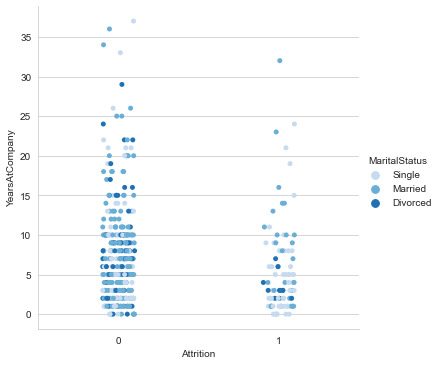

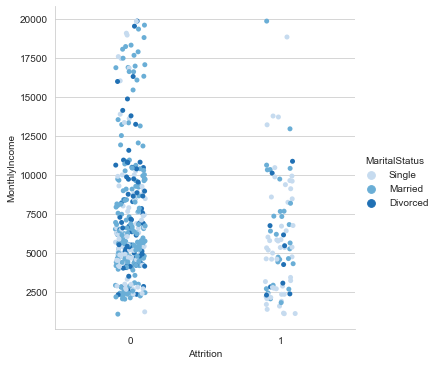

In [54]:
palette=sns.color_palette('Blues', 3)
sns.catplot(x='Attrition', y='YearsAtCompany', hue='MaritalStatus', data=df_dep, palette=palette)
sns.catplot(x='Attrition', y='MonthlyIncome', hue='MaritalStatus', data=df_dep, palette=palette)
plt.show()

#### As we can see in the first graph, single employes are resigning and retiring more than others. The second graph is showing us that we have many employes wanting get out, and the most of the employes with salary more than ten thousand dollars are single. 

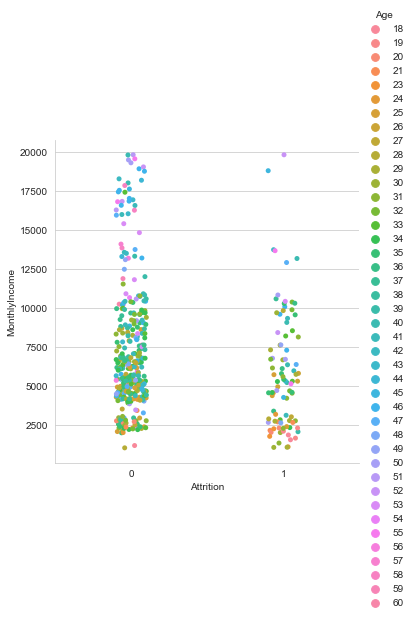

In [57]:
sns.catplot(data = df_dep, x='Attrition', y='MonthlyIncome', hue='Age')
plt.show()

#### Above we can see the monthly income and the attrition of the employes according to age.

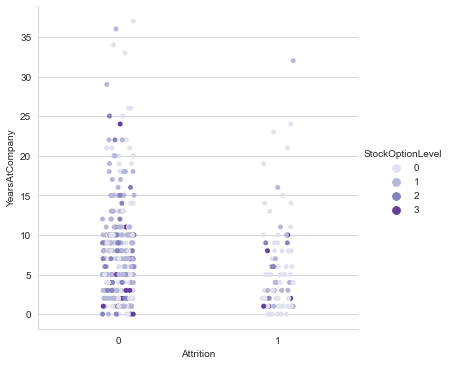

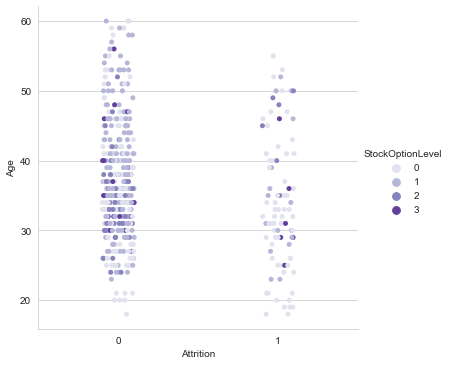

In [55]:
palette=sns.color_palette('Purples', 4)
sns.catplot(x='Attrition', y='YearsAtCompany', hue='StockOptionLevel', data=df_dep, palette=palette)
sns.catplot(x='Attrition', y='Age', hue='StockOptionLevel', data=df_dep, palette=palette)
plt.show()

#### We are seeing in these two graphs above, ours employes without stock option are retiring and resigning more frequently.

### ...

### Summary report: 

###
+ We have a lot of single employes wanting retire or resign and few employes that are married or divorced want to get out of the company. 

+ The most numbers of these employers are from sales department, and the most numbers of employes that want to get out of our company have between 27 to 37 years old. 

+ The employes that were working overtime and mainly have a monthly income less than eleven thousand dollars, are resquesting to resign or retire much more than others.

+ The employes without the stock option have a high records of resigning and retiring, mainly whether the employe have less than seven years working with us.

# Thanks for working with me.